# Tutorial 3 - Dual spaces

The dual, $X'$, of a Hilbert space, $X$, is the set of all continuous linear functional on $E$. The Riesz representation theorem states that every Hilbert space is isometrically isomorphic to its dual. This means that there is a continuous linear mapping,  $J_{X}\in \mathrm{Hom}(X',X)$, such that
$$
\langle u',u \rangle = (J_{X}u', u)_{X}, 
$$
for every $u' \in X'$ and $u \in X$ while also $\|u'\|_{X'} = \|J_{X}u'\|_{X}$. Within this tutorial we will look at the ```LinearForm``` class that is used to define dual vectors for a given ```HilbertSpace```. We will also see that each ```HilbertSpace``` can automatically generate its dual space with this being another instance of ```HilbertSpace```. Finally, ```HilbertSpaces``` provide the mappings to and from their dual spaces described by the Riesz representation theorem. 

### The ```LinearForm``` class

To begin, we look again at Euclidean space. First we construct an instance of ```EuclideanSpace``` and import also the ```LinearForm``` class. 

In [32]:
from pygeoinf import EuclideanSpace, LinearForm
X = EuclideanSpace(5)

Construction of a ```LinearForm``` can be done by specifying the its action on a vector. The the example below, we define a linear form that maps a vector in ```X``` to the value of its zeroth-component. 

In [33]:
# Define the linear form in terms of its mapping. 
l = LinearForm(X, mapping=lambda x : x[0])

# Test its action on a random vector. 
x = X.random()
print(f"The vector is: {x}")
print(f"The action of the linear form produces: {l(x)}")

The vector is: [-0.1195868  -0.98916626  0.20614271  1.51385075 -0.99099207]
The action of the linear form produces: -0.11958679725371596


Note that the action of a ```LinearForm``` on a vector is through the object's ```__call__``` method. There is no check within the class that the mapping asigned to a ```LinearForm``` is well-defined. In a later tutorial we discuss methods for doing this.

Recall that each ```HilbertSpace``` is associated with a mapping from a vector to its components. We shall write this mapping as $P_{X} \in \mathrm{Hom}(X,\mathbb{R}^{n})$ where $n$ is the dimension of the space. The inverse mapping from a components into the space is then written 
$I_{X}(\mathbb{R}^{n}, x)$. Within this notation we can see $P_{X}$ has standing for a *co-ordinate projection* while $I_{X}$ is a *co-ordinate inclusion*. These mappings induce corresponding co-ordinate mappings for linear forms. To see this, let $\{e_{i}\}$ be the basis for $X$ obtained by mapping the standard basis vectors on $\mathbb{R}^{n}$. We can then write any $x \in X$ as
$$
x = \sum_{i} x_{i} e_{i}, 
$$
with $\{x_{i}\}$  the vectors components. It terms of this basis, we can define a basis for linear forms $\{e_{i}'\}$ through the requirement that
$$
\langle e_{i}', e_{j} \rangle = \delta_{ij.}
$$
With this basis, each linear form can be written 
$$
x' = \sum_{i} x_{i}' e_{i}',
$$
where the $\{x_{i}'\}$ are its components. To illustrate this idea, we can redefine the above linear form in terms of its components. 

In [34]:
import numpy as np

# Set the component vector. 
cp = np.zeros(X.dim)
cp[0] = 1

# Define the linear form
xp = LinearForm(X, components=cp)

# Test its action on a random vector. 
x = X.random()
print(f"The vector is: {x}")
print(f"The action of the linear form produces: {xp(x)}")


The vector is: [ 1.10032718  0.4028123  -0.06703696 -0.85173451  0.54315804]
The action of the linear form produces: 1.1003271768241512


A ```LinearForm``` can be defined either through a ```mapping``` or its ```components```. Having defined a linear form, we can access its components as follows:

In [35]:
print(f'The components of the linear form are: {xp.components}')

The components of the linear form are: [1. 0. 0. 0. 0.]


If a ```LinearForm``` has been defined in terms of its components, then this property simply returns the stored values. When, however, the form has been defined in terms of a mapping the components need to be generated by successively acting the form on the basis vectors for the space. The first time the ```components``` property is called the components will be generated and stored if they are not already present. This aids with efficiency in several places at only a relatively slight storage cost. 

We can also call ```print``` directly on a ```LinearForm``` with the result being that its components are printed:

In [36]:
print(f'The components of the form are: {xp}')

The components of the form are: [1. 0. 0. 0. 0.]


Linear forms over a Hilbert space form a vector space in a natural way. This is implemented in ```LinearForm``` through suitable overloads:

In [37]:
# Define two linear forms
xp1 = LinearForm(X, mapping= lambda x : x[0])
xp2 = LinearForm(X, mapping= lambda x : sum(x))

# Print their action on a random vector. 
x = X.random()
a1 = xp1(x)
a2 = xp2(x)
print(f'Action of the first form: {a1}')
print(f'Action of the second form: {a2}')

# Form a linear combination of the forms
xp3 = 4 * xp1 - xp2 / 5
a3 = 4 * a1 - a2 / 5
print(f"Action of the combined form: {xp3(x)}")
print(f"Combination of the results: {a3}")

Action of the first form: 0.7206356823564907
Action of the second form: -1.2270063192484137
Action of the combined form: 3.1279439932756454
Combination of the results: 3.1279439932756454


Within such expressions the evaluation is usually done lazily. When, however, all forms involved have their components stored then the new components are calculated and stored to aid in efficiency. 

We can similarly define instances of ```LinearForm``` on more complicated ```HilbertSpaces```:

In [38]:
# Construct a Sobolev space on the unit circle. 
from pygeoinf.homogeneous_space.circle import  Sobolev
Y = Sobolev.from_sobolev_parameters(2, 0.05)

# Set up a linear form that evaluates the function at or close to  pi. 
vp = LinearForm(Y, mapping=lambda u : u[Y.dim//2])

# Define a function. 
u = Y.project_function(lambda th : np.cos(th))

# Print the action of the form on the function. 
print(f'Action of the linear form : {vp(u)}')

Action of the linear form : -1.0


## The dual of a ```HilbertSpace```

For each ```HilbertSpace``` there is a corresponding dual space which is another instance of ```HilbertSpace```. This can be generated using the ```dual``` property. This is illustrated below:

In [39]:
# Form the dual space. 
Xp = X.dual
print(f"The dimension of the dual space is {Xp.dim}")

# Define a linear form an get its components. 
xp = LinearForm(X, mapping=lambda x : 2*x[0]-x[2])
cp = X.to_components(xp)
print(f"The linear form has components {cp}")

# Print the norm of the linear form. 
print(f"The linear form has norm: {Xp.norm(xp)}")


The dimension of the dual space is 5
The linear form has components [ 2.  0. -1.  0.  0.]
The linear form has norm: 2.23606797749979


Each ```HilbertSpace``` can map between itself and its dual space using the ```from_dual``` and ```to_dual``` methods. These mappings for a Hilbert space, $X$, are implementation of the operator $J_{X} \in \mathrm{Hom}(X',X)$  discussed above. In the following code, we see that the defining properties of this mapping are met in the case of ```EuclideanSpace```. 

In [40]:
# Generate a random vector and dual vector
x = X.random()
yp = X.dual.random()

print(f'The vector is:      {x}')
print(f'The dual vector is: {yp}')

# Print the value of the dual pairing.
print(f'Value of the dual pairing:                {yp(x)}')

# Map the dual vector to X. 
y = X.from_dual(yp)

# Print the inner product of y and x. 
print(f'Value of the corresponding inner product: {X.inner_product(y,x)}')

# Print the dual norm and that of its representation. 
print(f'The dual vector has norm:    {Xp.norm(yp)}')
print(f'Its representation has norm: {X.norm(y)}')

The vector is:      [-0.11148301 -1.30444914  1.56285513  0.7195914  -0.38584892]
The dual vector is: [ 0.76781865  0.12679025 -1.61888019 -2.11010549 -0.71334543]
Value of the dual pairing:                -4.024235587366528
Value of the corresponding inner product: -4.024235587366528
The dual vector has norm:    2.8614334213437083
Its representation has norm: 2.8614334213437083


In the case of ```EuclideanSpace``` the mappings to and from the dual space are trivial; a vector and its image in the dual space have the same components. In more complicated spaces, however, the mappings to and from the dual space are more involved. In the case of $H^{s}(\mathbb{S}^{1})$, for example, it can be shown that 
$$
H^{s}(\mathbb{S}^{1})' \cong H^{-s}(\mathbb{S}^{1}), 
$$
in terms of which the necessary mapping from $H^{s}(\mathbb{S}^{1})'$ to $H^{s}(\mathbb{S}^{1})$ can be written
$$
J_{H^{s}(\mathbb{S}^{1})} = (1+\lambda^{2}\Delta)^{-s}.
$$
A further key property of this space is that when $s > 1/2 + k$ we have the continuous embedding
$$
H^{s}(\mathbb{S}^{1}) \subseteq C^{k}(\mathbb{S}^{1}).
$$
This means, for example, that when $s > 0.5$ point evaluation defines a continuous linear form and hence we can compute its representation in $H^{s}(\mathbb{S}^{1})$. This is done in the following code using the ```LinearForm```  defined above. 


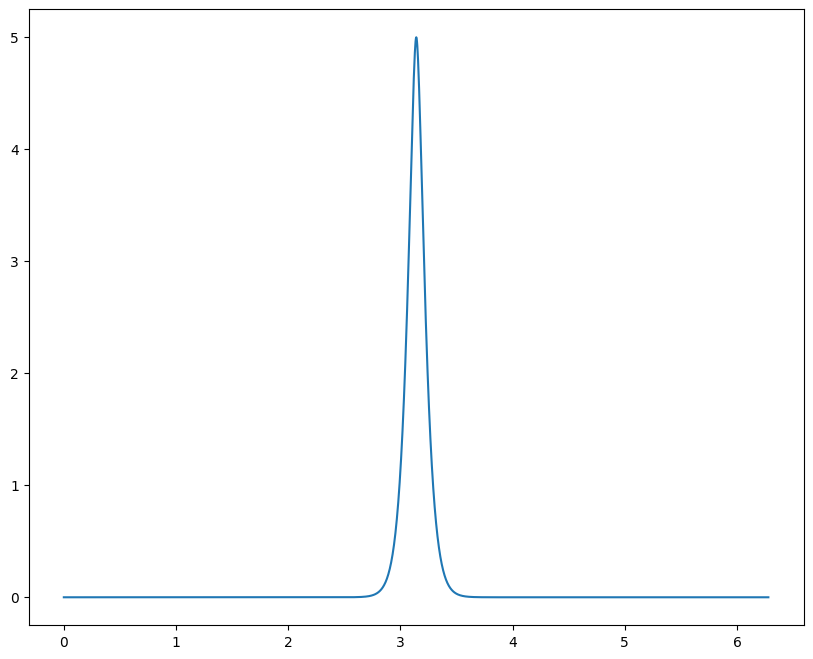

Action of the linear form : -1.0
Corresponding inner product : -0.9999999999999984


In [41]:
import matplotlib.pyplot as plt

# Convert the linear form to the space and plot its form. 
v = Y.from_dual(vp)
Y.plot(v)
plt.show()

# Check that it does the right job. 
print(f'Action of the linear form : {vp(u)}')
print(f'Corresponding inner product : {Y.inner_product(v,u)}')


In the above example, we are looking at the Dirac measure, $\delta_{\theta}$, and its representation in $H^{s}(\mathbb{S}^{1})$ for suitable $s$. Because this example arises commonly in applications, it is implemented within ```Sobolev```:

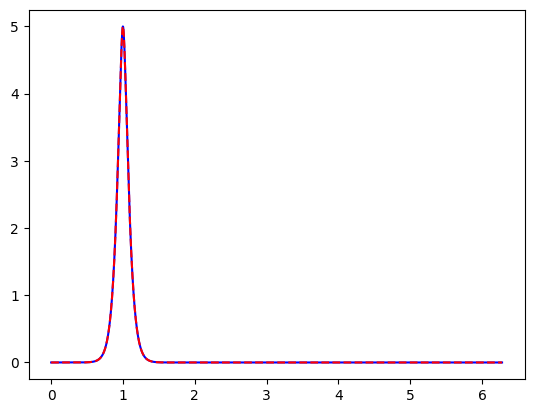

In [42]:
# Set the base point
th = 1

# Get the Dirac measure
vp = Y.dirac(th)

# Form its representation. 
v = Y.from_dual(vp)

# This can also be done directly. 
w = Y.dirac_representation(th)

# Plot both
fig, ax = plt.subplots()
Y.plot(v, fig=fig, ax=ax, color = 'b')
Y.plot(w, fig=fig, ax=ax, color = 'r', linestyle="--")
plt.show()

Note that the ```dirac``` method defines the ```LinearForm``` directly in terms of its Fourier components which is significantly more efficient. 

We note that the ```from_sobolev_parameters``` method within ```Sobolev``` selects $k_{\mathrm{max}}$ using an estimate of the truncation error in representing the Dirac measure in this space. This is why it is only available when $s > 0.5$.

If $X$ is a Hilbert space and $X'$ its dual, we can also form the double dual $X''$. Strictly, $X$ and $X''$ are not the same objects, but they are canonically isomorphic. Within the ```HilbertSpace``` class, however, the dual of a dual space is set equal to the orignal space. 

This is seen below. 

In [50]:
print(X == X.dual.dual)
print(Y == Y.dual.dual)

True
True
